# Comparison of decay pattern for different query profile sizes

### 1. Import required modules

In [1]:
import matplotlib.lines as mlines
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

### 2. Read similarity scores

In [38]:
def load_decay_results(filename):
    infile=open(filename)
    metricset=set()
    numreplacedset=set()
    next(infile)
    signalbestscores=dict()
    for line in infile:
        queryid,numreplaced,match_bp_sym_pic,bp_sym_pic,match_bp_sym_aic,bp_sym_aic,match_bp_asym_pic,bp_asym_pic,match_bp_asym_aic,bp_asym_aic,match_ap_pic,ap_pic,match_ap_aic,ap_aic,match_bp_asym_simj,bp_asym_simj,match_bp_sym_simj,bp_sym_simj,match_ap_simj,ap_simj=line.split("\t")
        numreplaced=int(numreplaced)
    

        if numreplaced not in signalbestscores:
            signalbestscores[numreplaced]=dict()
            numreplacedset.add(numreplaced)


        metricset,signalbestscores=populate_score("bp_sym_pic",numreplaced,metricset,signalbestscores,bp_sym_pic)
        metricset,signalbestscores=populate_score("bp_sym_aic",numreplaced,metricset,signalbestscores,bp_sym_aic)
        metricset,signalbestscores=populate_score("bp_asym_pic",numreplaced,metricset,signalbestscores,bp_asym_pic)
        metricset,signalbestscores=populate_score("bp_asym_aic",numreplaced,metricset,signalbestscores,bp_asym_aic)
        metricset,signalbestscores=populate_score("ap_pic",numreplaced,metricset,signalbestscores,ap_pic)
        metricset,signalbestscores=populate_score("ap_aic",numreplaced,metricset,signalbestscores,ap_aic)
        metricset,signalbestscores=populate_score("bp_sym_simj",numreplaced,metricset,signalbestscores,bp_sym_simj)
        metricset,signalbestscores=populate_score("bp_asym_simj",numreplaced,metricset,signalbestscores,bp_asym_simj)
        metricset,signalbestscores=populate_score("ap_simj",numreplaced,metricset,signalbestscores,ap_simj)
    infile.close()
    return metricset,numreplacedset,signalbestscores


### 3. Method to add series to sub-plot

In [39]:
def plot(metricset,signalbestscores,axarr,colorindex,maxi,maxj):
    i=j=0
    for metric in sorted(metricset):
        signallist=[]
        errorlist=[]
        for numreplaced in sorted(numreplacedset):
            signallist.append(np.mean(signalbestscores[numreplaced][metric]))
            errorlist.append(error(signalbestscores[numreplaced][metric]))
        axarr[i, j].errorbar(list(sorted(numreplacedset)),signallist,yerr=errorlist,color=colors[colorindex])
        axarr[i, j].set_title(title[metric])
        axarr[i, j].set_ylim(0,1)

        j+=1
        if j==maxj:
            i+=1
            j=0
        if i==maxi:
            i=0 
    return axarr


### 4. Plot similarity scores at various levels of decay

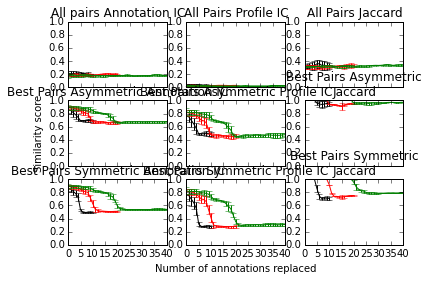

In [50]:
i=j=3
f, axarr = plt.subplots(i, j)
colors=['black','red','green']
legend=[]
colorindex=0

title=dict()
title['groupwise_aic_resnik']="Groupwise Resnik Annotation IC"
title['groupwise_pic_resnik']="Groupwise Resnik Profile IC"
title['ap_aic']="All pairs Annotation IC"
title['ap_pic']="All Pairs Profile IC"
title['bp_asym_aic']="Best Pairs Asymmetric Annotation IC"
title['bp_asym_pic']="Best Pairs Asymmetric Profile IC"
title['bp_sym_aic']="Best Pairs Symmetric Annotation IC"
title['bp_sym_pic']="Best Pairs Symmetric Profile IC"
title['ap_simj']="All Pairs Jaccard"
title['bp_asym_simj']="Best Pairs Asymmetric\nJaccard"
title['bp_sym_simj']="Best Pairs Symmetric\nJaccard"
title['groupwise_jaccard']="Groupwise Jaccard"



metricset,numreplacedset,signalbestscores=load_decay_results("../../results/Decay/Integrated_ProfileSize10_Results.tsv")
axarr=plot(metricset,signalbestscores,axarr,colorindex,i,j)


colorindex+=1
metricset,numreplacedset,signalbestscores=load_decay_results("../../results/Decay/Integrated_ProfileSize20_Results.tsv")
axarr=plot(metricset,signalbestscores,axarr,colorindex,i,j)

colorindex+=1
metricset,numreplacedset,signalbestscores=load_decay_results("../../results/Decay/Integrated_ProfileSize40_Results.tsv")
axarr=plot(metricset,signalbestscores,axarr,colorindex,i,j)

plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_xticklabels() for a in axarr[1, :]], visible=False)
axarr[2,1].set_xlabel('Number of annotations replaced')
axarr[1,0].set_ylabel('Similarity score')    
plt.show()


## Comparison of Resnik to Groupwise Resnik

### 1. Load scores for groupwise Resnik

In [51]:
def load_groupwise_resnik_decay(filename,signalbestscores):
    infile=open(filename)
    numreplacedset=set()
    next(infile)
    for line in infile:
        queryid,numreplaced,bestmatch_aic,score_aic,bestmatch_pic,score_pic=line.split("\t")
        numreplaced=int(numreplaced)
    

        if numreplaced not in signalbestscores:
            signalbestscores[numreplaced]=dict()
            numreplacedset.add(numreplaced)

        if 'groupwise_aic_resnik' not in signalbestscores[numreplaced]:
            signalbestscores[numreplaced]['groupwise_aic_resnik']=[]
        signalbestscores[numreplaced]['groupwise_aic_resnik'].append(float(score_aic))

        if 'groupwise_pic_resnik' not in signalbestscores[numreplaced]:
            signalbestscores[numreplaced]['groupwise_pic_resnik']=[]
        signalbestscores[numreplaced]['groupwise_pic_resnik'].append(float(score_pic))

    infile.close()
    return signalbestscores

### 2. Plot Resnik similarity scores at different levels of decay

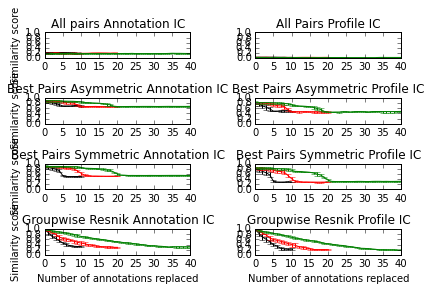

In [48]:
i=4
j=2
f, axarr = plt.subplots(i, j)
legend=[]
colorindex=0

metriclist=['ap_aic','ap_pic','bp_sym_aic','bp_sym_pic','bp_asym_aic','bp_asym_pic','groupwise_aic_resnik','groupwise_pic_resnik']
metricset,numreplacedset,signalbestscores=load_decay_results("../../results/Decay/Integrated_ProfileSize10_Results.tsv")
signalbestscores=load_groupwise_resnik_decay("../../results/Decay/Groupwise_Related_Resnik_ProfileSize10_Results.tsv",signalbestscores)
axarr=plot(metriclist,signalbestscores,axarr,colorindex,i,j)



metricset,numreplacedset,signalbestscores=load_decay_results("../../results/Decay/Integrated_ProfileSize20_Results.tsv")
signalbestscores=load_groupwise_resnik_decay("../../results/Decay/Groupwise_Related_Resnik_ProfileSize20_Results.tsv",signalbestscores)
colorindex+=1
axarr=plot(metriclist,signalbestscores,axarr,colorindex,i,j)


metricset,numreplacedset,signalbestscores=load_decay_results("../../results/Decay/Integrated_ProfileSize40_Results.tsv")
signalbestscores=load_groupwise_resnik_decay("../../results/Decay/Groupwise_Related_Resnik_ProfileSize40_Results.tsv",signalbestscores)
colorindex+=1
axarr=plot(metriclist,signalbestscores,axarr,colorindex,i,j)
    
axarr[3,1].set_xlabel('Number of annotations replaced')
axarr[3,0].set_xlabel('Number of annotations replaced')
axarr[0,0].set_ylabel('Similarity score')
axarr[1,0].set_ylabel('Similarity score')
axarr[2,0].set_ylabel('Similarity score')
axarr[3,0].set_ylabel('Similarity score')
f.set_tight_layout(True)
plt.show()

## Comparison of Jaccard to Groupwise Jaccard

## 1. Load scores for groupwise Jaccard

In [54]:
def load_groupwise_simj_decay(filename,metric,signalbestscores):
    infile=open(filename)
    numreplacedset=set()
    next(infile)
    for line in infile:
        queryid,numreplaced,bestmatch,score=line.split("\t")
        numreplaced=int(numreplaced)
    

        if numreplaced not in signalbestscores:
            signalbestscores[numreplaced]=dict()
            numreplacedset.add(numreplaced)

        if metric not in signalbestscores[numreplaced]:
            signalbestscores[numreplaced][metric]=[]
        signalbestscores[numreplaced][metric].append(float(score))
    infile.close()
    return signalbestscores


### 2. Plot Jaccard similarity scores at different levels of decay

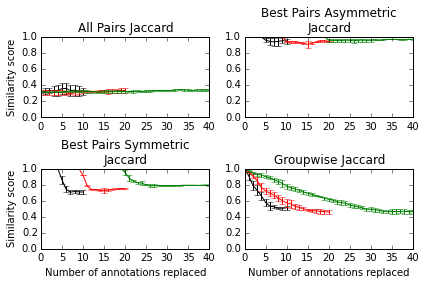

In [56]:
i=j=2
f, axarr = plt.subplots(i, j)
legend=[]
colorindex=0

metriclist=['ap_simj','bp_asym_simj','bp_sym_simj','groupwise_jaccard']
metricset,numreplacedset,signalbestscores=load_decay_results("../../results/Decay/Integrated_ProfileSize10_Results.tsv")
signalbestscores=load_groupwise_simj_decay("../../results/Decay/Groupwise_SimJ_ProfileSize10_Results.tsv","groupwise_jaccard",signalbestscores)
axarr=plot(metriclist,signalbestscores,axarr,colorindex,i,j)



metricset,numreplacedset,signalbestscores=load_decay_results("../../results/Decay/Integrated_ProfileSize20_Results.tsv")
signalbestscores=load_groupwise_simj_decay("../../results/Decay/Groupwise_SimJ_ProfileSize20_Results.tsv","groupwise_jaccard",signalbestscores)
colorindex+=1
axarr=plot(metriclist,signalbestscores,axarr,colorindex,i,j)



metricset,numreplacedset,signalbestscores=load_decay_results("../../results/Decay/Integrated_ProfileSize40_Results.tsv")
signalbestscores=load_groupwise_simj_decay("../../results/Decay/Groupwise_SimJ_ProfileSize40_Results.tsv","groupwise_jaccard",signalbestscores)
colorindex+=1
axarr=plot(metriclist,signalbestscores,axarr,colorindex,i,j)

   
axarr[1,1].set_xlabel('Number of annotations replaced')
axarr[1,0].set_xlabel('Number of annotations replaced')
axarr[0,0].set_ylabel('Similarity score')
axarr[1,0].set_ylabel('Similarity score')
plt.tight_layout()
plt.show()


### Helper methods

In [13]:
def error(scorelist):
    return 2*(np.std(scorelist)/math.sqrt(len(scorelist)))

def populate_score(metric,numreplaced,metricset,signalbestscores,score):
    metricset.add(metric)
    if score.strip() !="":
        if metric not in signalbestscores[numreplaced]:
            signalbestscores[numreplaced][metric]=[]
        signalbestscores[numreplaced][metric].append(float(score))
    return metricset,signalbestscores